<a href="https://colab.research.google.com/github/Rooban-Jeyasundar/Unsupervised_ML_Project/blob/main/Unsupervised_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Member  -**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go


# libraries used to process textual data
import string
string.punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#more libraries to data transformation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [3]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv


### Dataset First View

In [4]:
# Dataset First Look
import io
netflix_df = pd.read_csv((io.BytesIO(uploaded['NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'])),encoding='unicode_escape')
print(netflix_df.sample(10))

     show_id     type                           title  \
5296   s5297    Movie                            Rukh   
3744   s3745  TV Show                      Love Alarm   
773     s774    Movie                          Bazaar   
4697   s4698    Movie  Our Planet - Behind The Scenes   
1480   s1481    Movie               Concrete Football   
4720   s4721    Movie                 P.S. I Love You   
2286   s2287    Movie                 Friday the 13th   
6698   s6699    Movie                     The Natural   
2085   s2086    Movie                      F.R.E.D.I.   
5558   s5559    Movie                   She's the One   

                            director  \
5296                 Atanu Mukherjee   
3744                             NaN   
773                    Sagar Sarhadi   
4697                             NaN   
1480  Jesse Adang, Syrine Boulanouar   
4720             Richard LaGravenese   
2286                   Marcus Nispel   
6698                  Barry Levinson   
2085        

In [5]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
# Dataset Rows & Columns count
print('Shape of Dataset',netflix_df.shape)
print('Count of Rows',netflix_df.shape[0])
print('Count of Columns',netflix_df.shape[1])

Shape of Dataset (7787, 12)
Count of Rows 7787
Count of Columns 12


### Dataset Information

In [7]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print('Count of Duplicate values in the dataset : ',len(netflix_df[netflix_df.duplicated()]),"Values")

Count of Duplicate values in the dataset :  0 Values


* From the above result, we clearly see that there are no duplicate values in the dataset.

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print('Null values in each columns')
netflix_df.isnull().sum()

Null values in each columns


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

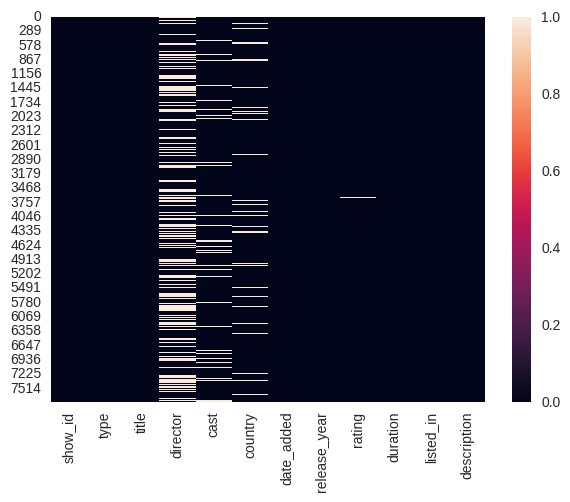

In [10]:
# Visualizing the missing values using heatmap
plt.figure(figsize=(7,5))
sns.heatmap(netflix_df.isnull())
plt.show()

### What did you know about your dataset?

From the study, we see that dataset "Netflix Movies and TV Shows Clustering" comprises 12 columns, with only one column having an integer data type.

From the analysis, we found that there is no duplicate values in any of the features.

Regarding null out of 12 columns, dataset have null values in five columns: director, cast, country, date_added, and rating.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print("Columns in the dataset : ")
netflix_df.columns

Columns in the dataset : 


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"RaÃºl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

Each column in the dataset is a variable which impacting the Netflix Movies and TV Shows Clustering Dataset.

Description of those variables are as follows:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
print('Number of unique values in each variable')
print("          ")

for i in netflix_df.columns:
  print('Count of unique values in :',i ,"-",netflix_df[i].nunique())# '{netflix_df[i].nunique()}')

Number of unique values in each variable
          
Count of unique values in : show_id - 7787
Count of unique values in : type - 2
Count of unique values in : title - 7787
Count of unique values in : director - 4049
Count of unique values in : cast - 6831
Count of unique values in : country - 681
Count of unique values in : date_added - 1565
Count of unique values in : release_year - 73
Count of unique values in : rating - 14
Count of unique values in : duration - 216
Count of unique values in : listed_in - 492
Count of unique values in : description - 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

#Here we're handling the null values from all features

print('Null values in each columns')
print("----------------------------------------------")
print(netflix_df.isnull().sum())
#As we know five colums have null values, we are checking the percentage of those values
print("----------------------------------------------")
print('Percentage of null values in each columns')
print("----------------------------------------------")
print(netflix_df.isnull().sum()/len(netflix_df)*100)

Null values in each columns
----------------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
----------------------------------------------
Percentage of null values in each columns
----------------------------------------------
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


* From the result, we see that 'date_added' and 'rating' variables have very less percentage of null count so we can drop those observations to avoid any biasness in our clustering model.
* On other send, We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high because we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown'.
* We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.

In [15]:
# As per our discussion

# Imputing null values of director and cast feature with unknown
netflix_df[['director','cast']]=netflix_df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
netflix_df['country']=netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
netflix_df.dropna(axis=0, inplace=True)

In [16]:
#Checking the outcome of above process
print('Null values in each columns')
print("----------------------------------------------")
print(netflix_df.isnull().sum())

Null values in each columns
----------------------------------------------
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


▶   **Some of the features have nested(combined) values like 'director', 'cast', 'listed_in' and 'country'. So we are handling those nested columns.**

In [17]:
# Let's create a copy of dataframe and unnest the original one
new_netflix_df = netflix_df.copy()

# Unnesting 'Directors' column
dir_constraint=netflix_df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = netflix_df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

,title,Directors
7568,The Underwear,Unknown
5718,Rounders,John Dahl
4568,Motown Magic,Unknown
8239,What the Health,Kip Andersen
1063,Bloodline,Unknown
6718,The Bye Bye Man,Stacy Title
2069,Eddie - Strongman,Matt Bell
6414,Sur Sapata,Mangesh Kanthale
6625,The Bad Education Movie,Elliot Hegarty
6566,The 24 Hour War,Adam Carolla


In [18]:
# Unnesting 'listed_in' column
listed_constraint=netflix_df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(listed_constraint, index = netflix_df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Genre'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

,title,Genre
14111,The Hockey Girls,TV Comedies
15274,The Violin Player,Dramas
1574,Band of Robbers,Action & Adventure
6226,Hubie Halloween,Horror Movies
3035,Cinderella and the Four Knights,International TV Shows
13386,The Big Flower Fight,International TV Shows
12845,Summer of '92,International Movies
5825,Head Count,Independent Movies
14722,The Other Guys,Comedies
11570,Rounders,Dramas


In [19]:
# Unnesting 'cast' column
cast_constraint=netflix_df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(cast_constraint, index = netflix_df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Actors'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)

,title,Actors
14310,EkÅi Elmalar,SongÃ¼l Ãden
28887,Melvin Goes to Dinner,Jack Black
54788,West Beirut,Joseph Bou Nassar
5021,Back to School,Pauline Deshons
21048,Hunt to Kill,Marie Avgeropoulos
14744,English Babu Desi Mem,Saeed Jaffrey
29736,Miss Hokusai,Mike Pollock
50458,The Uncanny Counter,Kim Se-jeong
22832,Jenni Rivera: Mariposa de Barrio,Xavier Ruvalcaba
43495,The 4th Company,Manuel Ojeda


In [20]:
# Unnesting 'country' column
country_constraint=netflix_df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = netflix_df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

,title,Country
9506,YucatÃ¡n,Spain
5211,My Little Pony Equestria Girls: Rollercoaster ...,United States
1317,Brave Miss World,Italy
6459,Sample This,United States
2423,Emma' (Mother),Indonesia
4844,Memories of the Alhambra,South Korea
2597,Fearless,Canada
4353,LEGO Ninjago: Masters of Spinjitzu,Canada
461,Ali's Wedding,Australia
6885,Sometimes,India


**Great, we have sucessfully separated values in the nested columns.**

**Next we have to merge all the created dataframe into the single dataframe.**

In [21]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
merged_df = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
merged_df.head()

,title,Genre,Directors,Actors,Country
0,3%,International TV Shows,Unknown,JoÃ£o Miguel,Brazil
1,3%,International TV Shows,Unknown,Bianca Comparato,Brazil
2,3%,International TV Shows,Unknown,Michel Gomes,Brazil
3,3%,International TV Shows,Unknown,Rodolfo Valente,Brazil
4,3%,International TV Shows,Unknown,Vaneza Oliveira,Brazil


In [22]:
# Merging unnested data with the created dataframe in order to make the final dataframe using left join

netflix_df = merged_df.merge(netflix_df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
netflix_df.head(5)

,title,Genre,Directors,Actors,Country,type,date_added,release_year,rating,duration,description
0,3%,International TV Shows,Unknown,JoÃ£o Miguel,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,3%,International TV Shows,Unknown,Bianca Comparato,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
2,3%,International TV Shows,Unknown,Michel Gomes,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
3,3%,International TV Shows,Unknown,Rodolfo Valente,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
4,3%,International TV Shows,Unknown,Vaneza Oliveira,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...


Next step is to looking to correct the datatype of each columns

####**Typecasting the attributes**

In [23]:
print('Columns in the dataset before typecasting')
netflix_df.columns.tolist()

Columns in the dataset before typecasting


['title',
 'Genre',
 'Directors',
 'Actors',
 'Country',
 'type',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'description']

In [24]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
netflix_df['duration']= netflix_df['duration'].apply(lambda x: int(x.split()[0]))

# Typecasting string object to datetime object of date_added column
netflix_df['date_added']= pd.to_datetime(netflix_df['date_added'])

# Extracting date, day, month and year from date_added column
netflix_df["day_added"]= netflix_df["date_added"].dt.day
netflix_df["month_added"]= netflix_df["date_added"].dt.month
netflix_df["year_added"]= netflix_df["date_added"].dt.year

# Dropping date_added
netflix_df.drop('date_added', axis=1, inplace=True)

In [25]:
# Checking info of the dataset after typecasting
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Genre         175807 non-null  object
 2   Directors     175807 non-null  object
 3   Actors        175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   release_year  175807 non-null  int64 
 7   rating        175807 non-null  object
 8   duration      175807 non-null  int64 
 9   description   175807 non-null  object
 10  day_added     175807 non-null  int64 
 11  month_added   175807 non-null  int64 
 12  year_added    175807 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 18.8+ MB


###**Bining the features**

In the rating column, we have different categories of content classified based on content rating these categories are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's look at some the categories and binnig them accordingly:

**TV-MA**: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R**: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13**: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

These are the explanations for some categories in the rating column. To reduce the complications, we are binning these several categories into some basic categories like.,

* **Adult Content**: TV-MA, NC-17, R
* **Children Content**:  TV-PG, PG, TV-G, G
* **Teen Content**: PG-13, TV-14
* **Family-friendly Content**: TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated**: NR, UR

In [26]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

netflix_df['rating'].replace(rating_map, inplace = True)
netflix_df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [27]:
#Reviewing the dataset after the process
netflix_df.head()

,title,Genre,Directors,Actors,Country,type,release_year,rating,duration,description,day_added,month_added,year_added
0,3%,International TV Shows,Unknown,JoÃ£o Miguel,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
1,3%,International TV Shows,Unknown,Bianca Comparato,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
2,3%,International TV Shows,Unknown,Michel Gomes,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
3,3%,International TV Shows,Unknown,Rodolfo Valente,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
4,3%,International TV Shows,Unknown,Vaneza Oliveira,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020


In [28]:
# Spearating the dataframes for further analysis
df_movies= netflix_df[netflix_df['type']== 'Movie']
df_tvshows= netflix_df[netflix_df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(126079, 13) (49728, 13)


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
df_movies.columns

Index(['title', 'Genre', 'Directors', 'Actors', 'Country', 'type',
       'release_year', 'rating', 'duration', 'description', 'day_added',
       'month_added', 'year_added'],
      dtype='object')

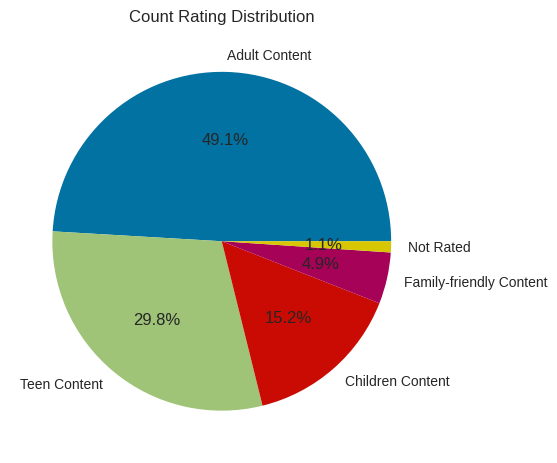

In [ ]:
# Chart - 1 visualization code
price_count = netflix_df['rating'].value_counts()
plt.pie(price_count,labels=price_count.index,autopct='%1.1f%%')
plt.title('Count Rating Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

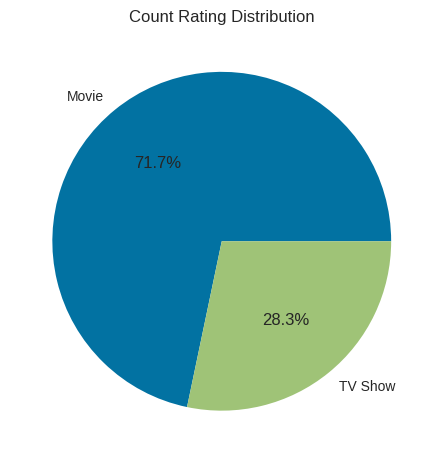

In [ ]:
# Chart - 2 visualization code

price_count = netflix_df['type'].value_counts()
plt.pie(price_count,labels=price_count.index,autopct='%1.1f%%')
plt.title('Count Rating Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

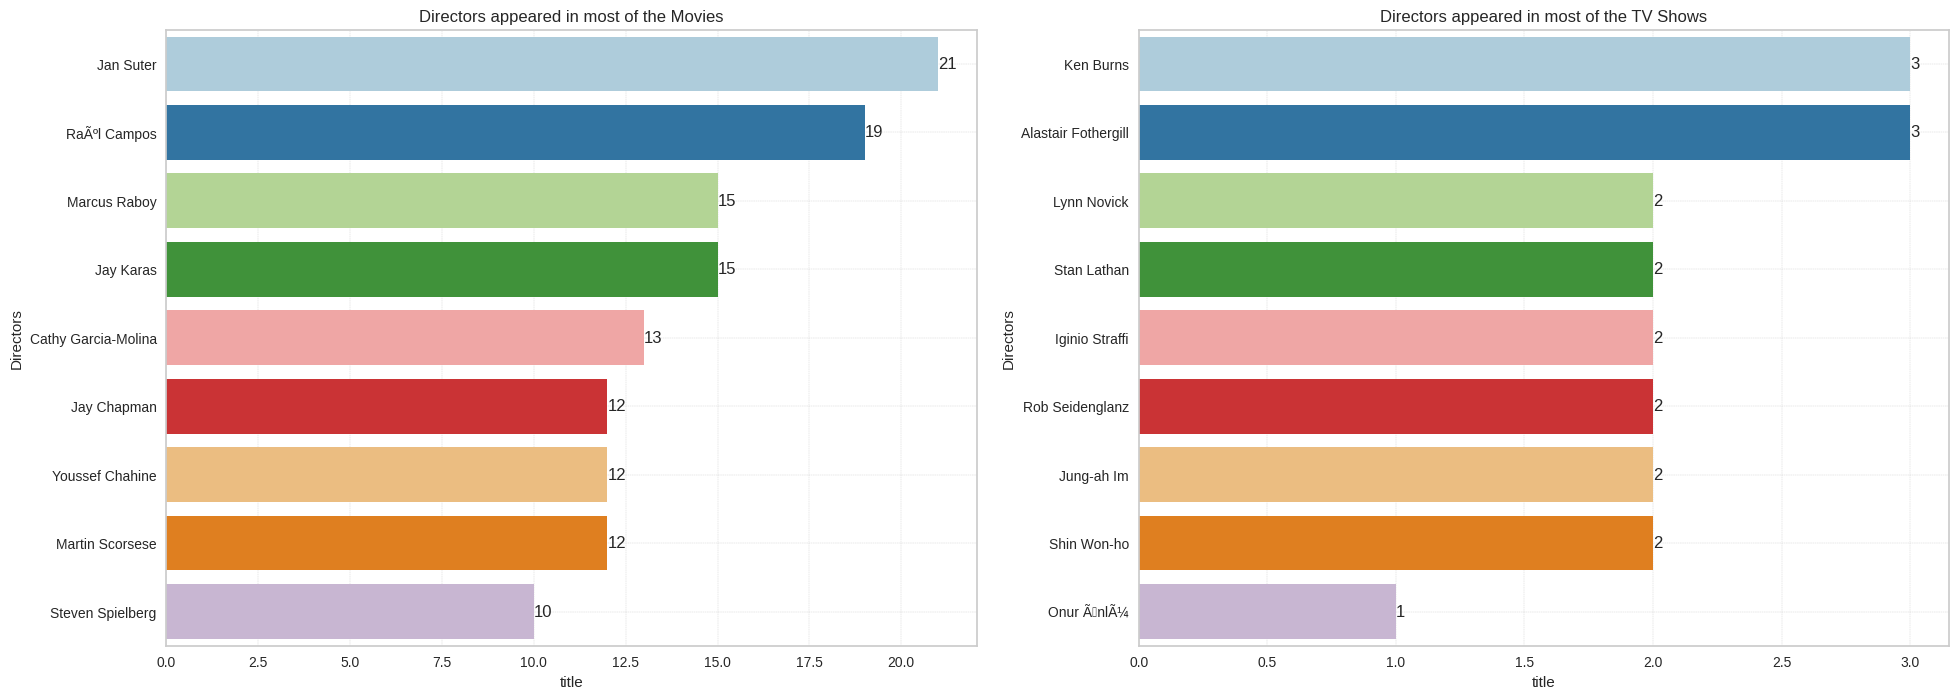

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Directors",x = 'title', data = df_director, palette='Paired')
  plt.title(f'Directors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

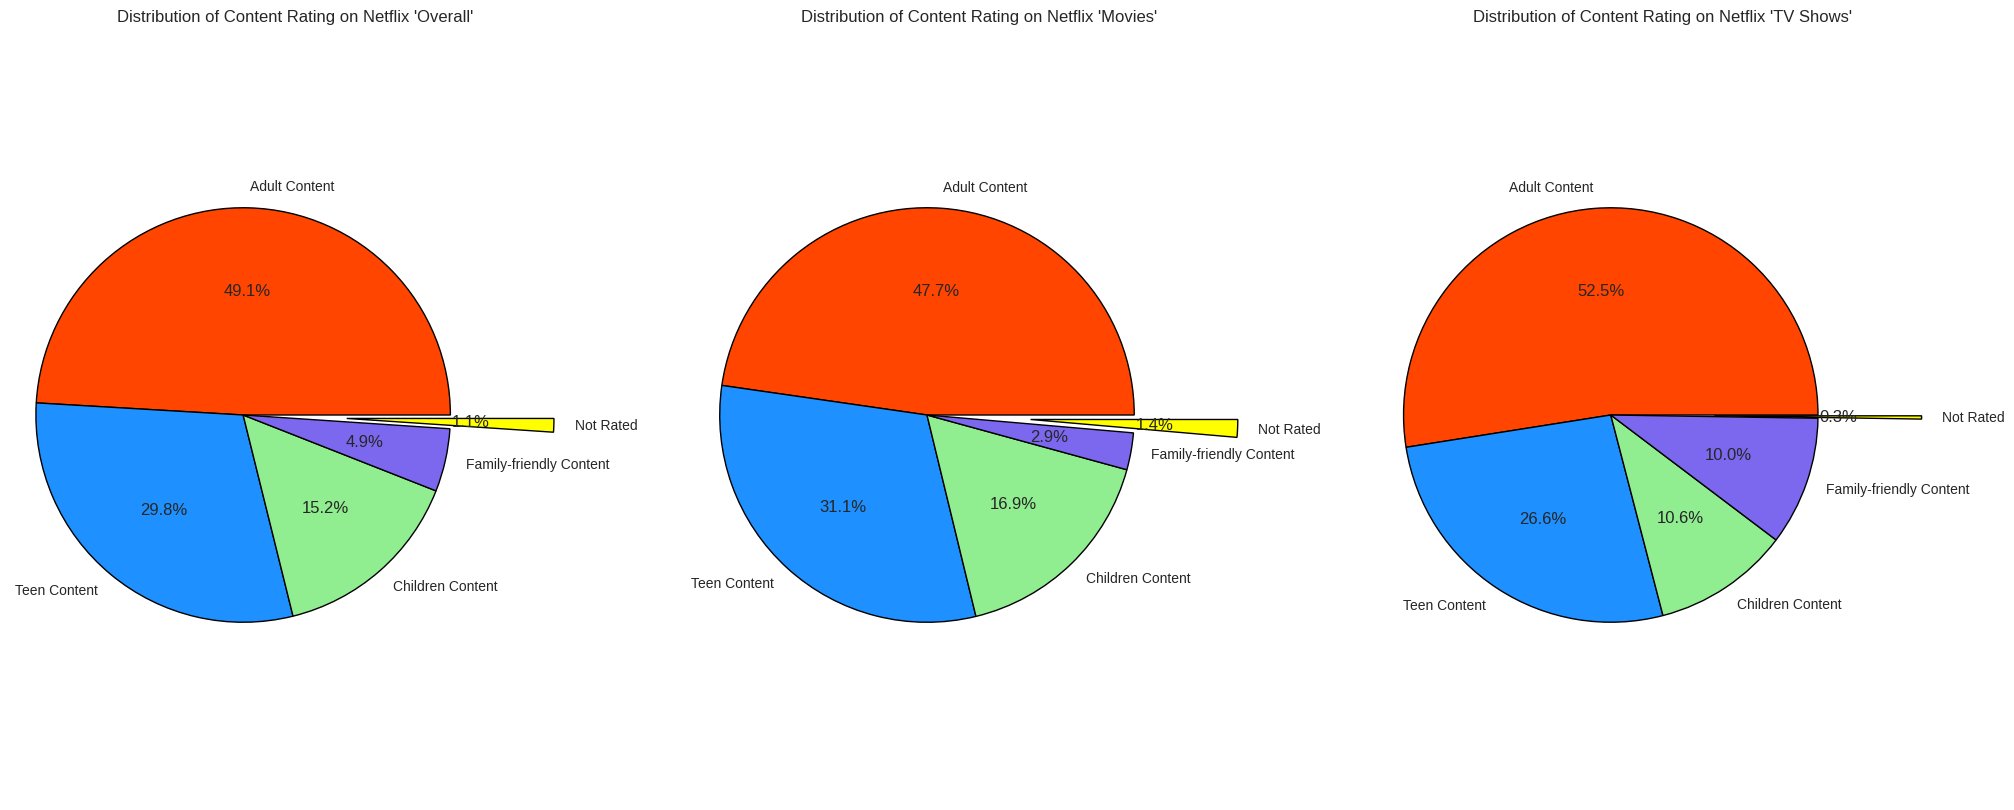

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(25,10))
for i,j,k in ((netflix_df, 'Overall',0),(df_movies, 'Movies',1),(df_tvshows, 'TV Shows',2)):
  plt.subplot(1,3,k+1)
  count= i['rating'].value_counts()
  plt.pie(count, labels=count.index,explode=(0,0,0,0,0.5),colors=['orangered','dodgerblue','lightgreen','mediumslateblue','yellow'],
          autopct='%1.1f%%', labeldistance=1.1,wedgeprops={"edgecolor" : "black",'linewidth': 1,'antialiased': True})
  plt.title(f"Distribution of Content Rating on Netflix '{j}'")
  plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

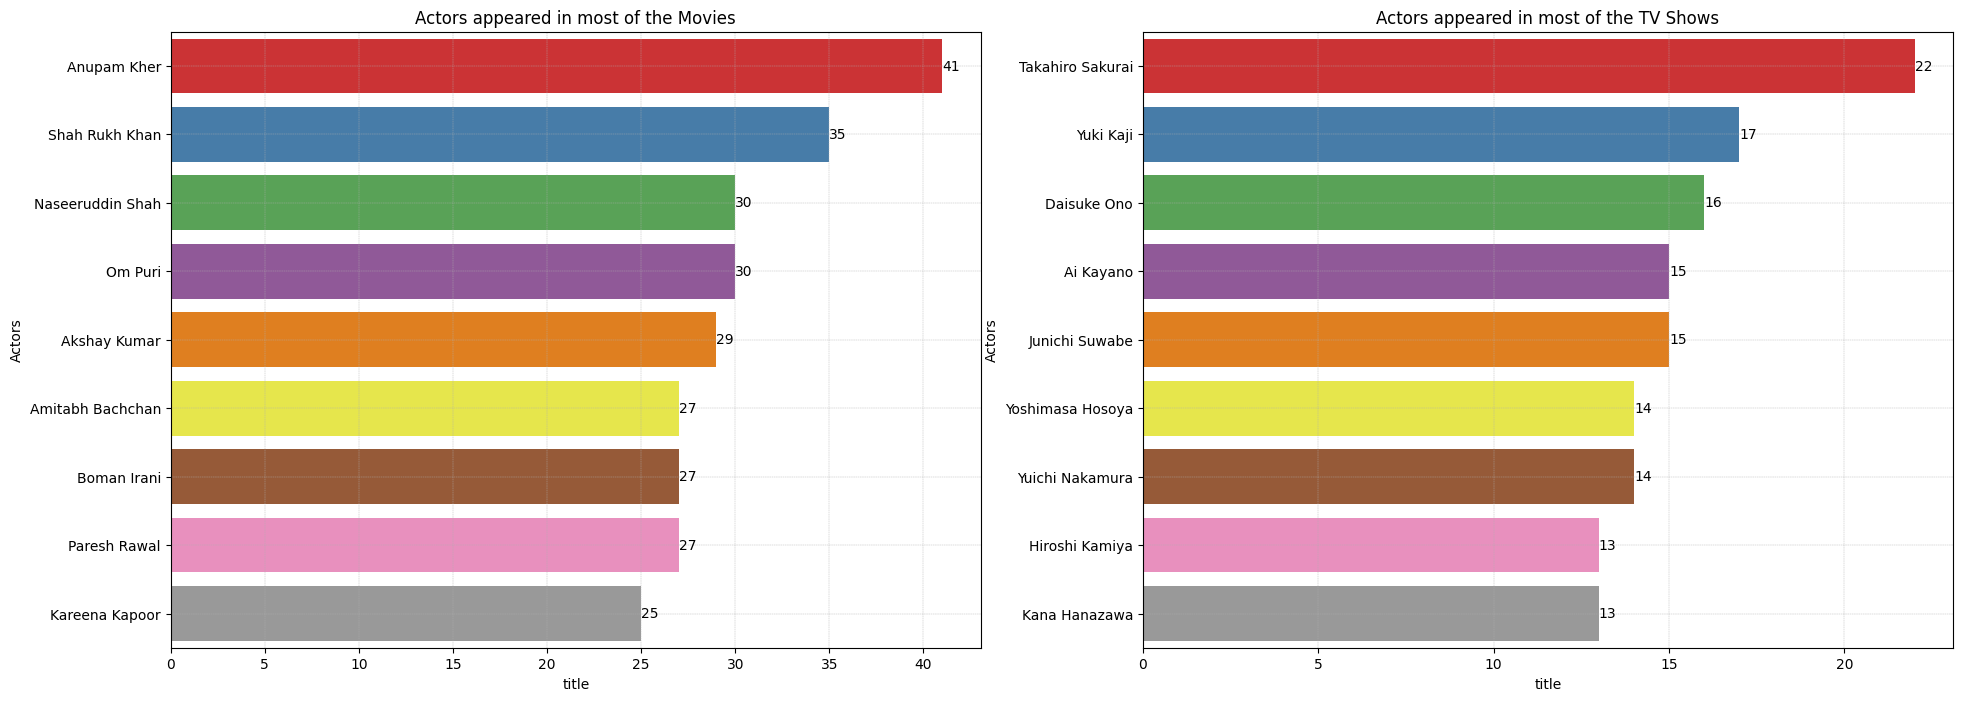

In [ ]:
# Chart - 5 visualization code
plt.style.use('default')
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_actor = i.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Actors",x = 'title', data = df_actor, palette='Set1')
  plt.title(f'Actors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

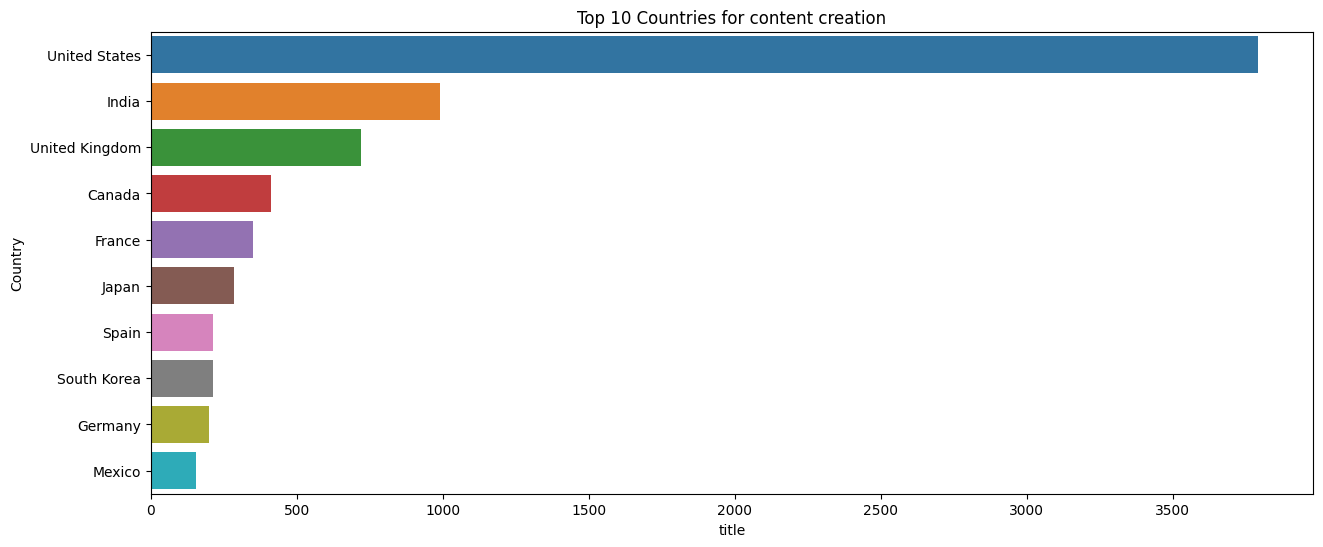

In [ ]:
# Chart - 6 visualization code

df_country = netflix_df.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "Country",x = 'title', data = df_country)
plt.title('Top 10 Countries for content creation')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

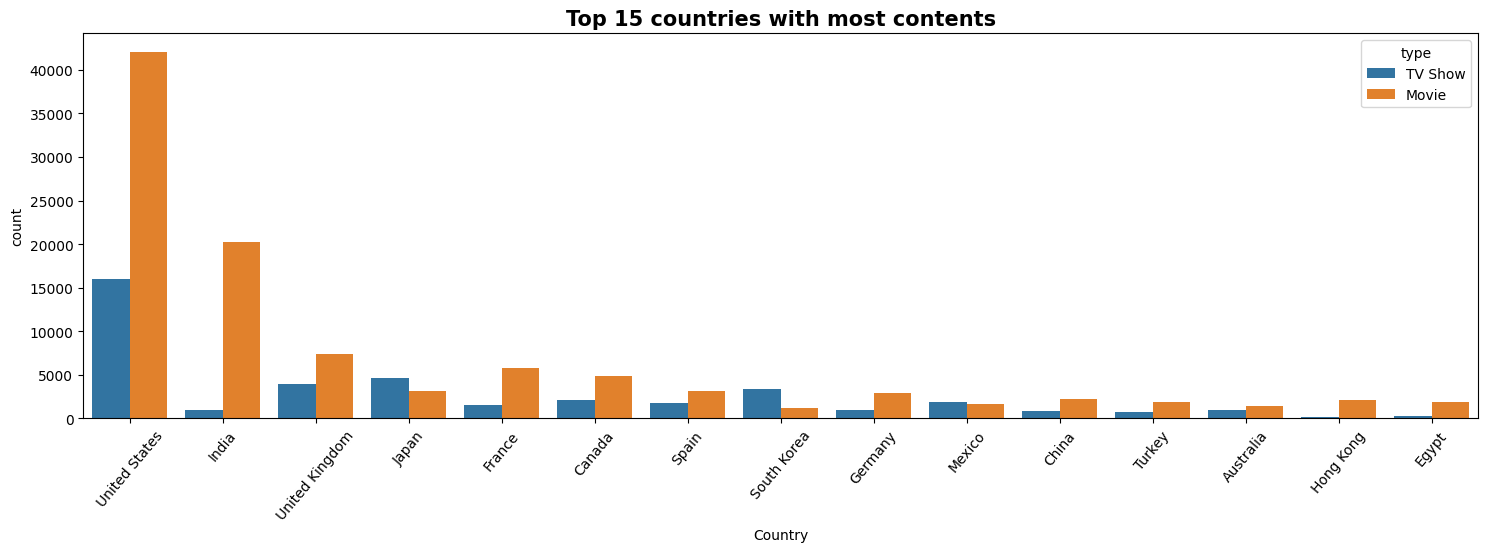

In [ ]:
# Chart - 7 visualization code

plt.figure(figsize=(18,5))
sns.countplot(x=netflix_df['Country'],order=netflix_df['Country'].value_counts().index[0:15],hue=netflix_df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

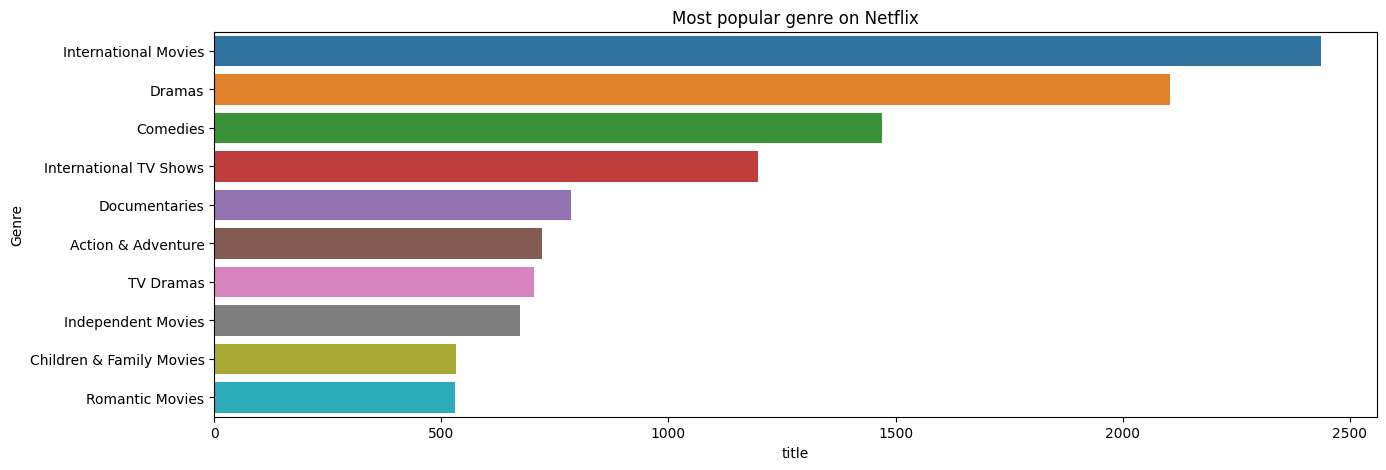

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15,5))
df_genre = netflix_df.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plots= sns.barplot(y = "Genre",x = 'title', data = df_genre)
plt.title(f'Most popular genre on Netflix')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

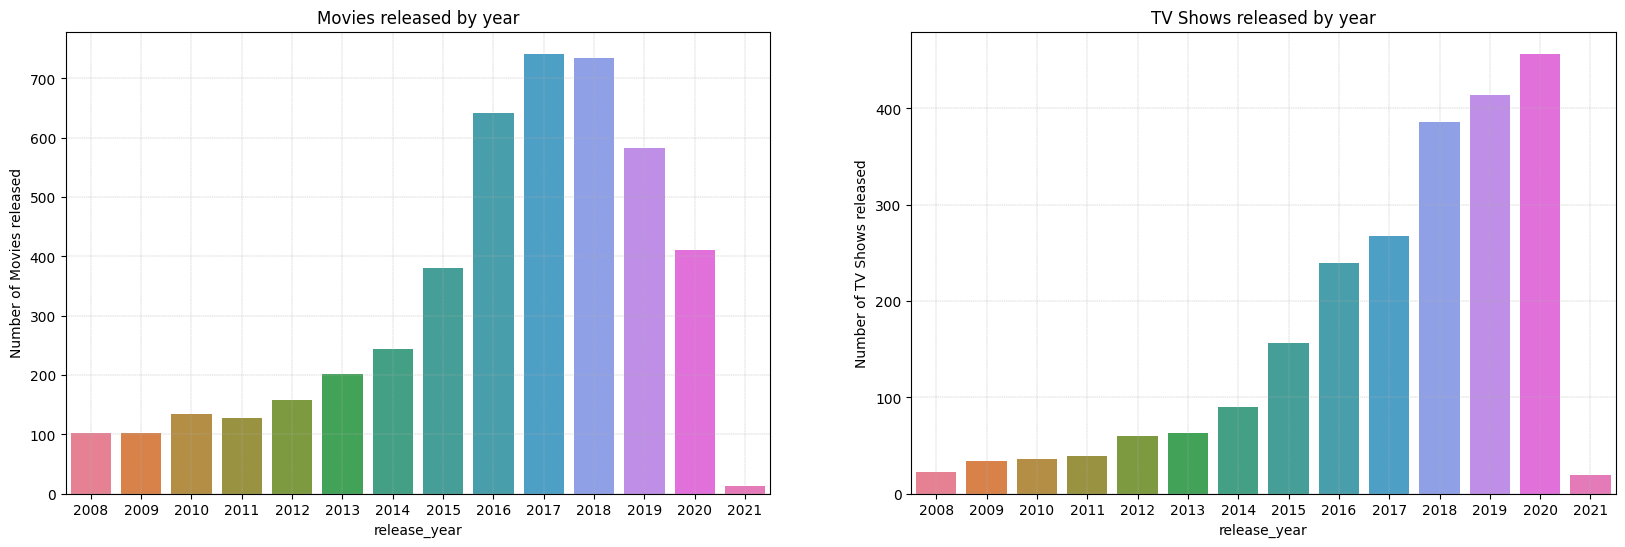

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_release_year = i.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by=['release_year'],ascending=False)[:14]
  plots= sns.barplot(x = 'release_year',y= 'title', data = df_release_year, palette='husl')
  plt.title(f'{j} released by year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

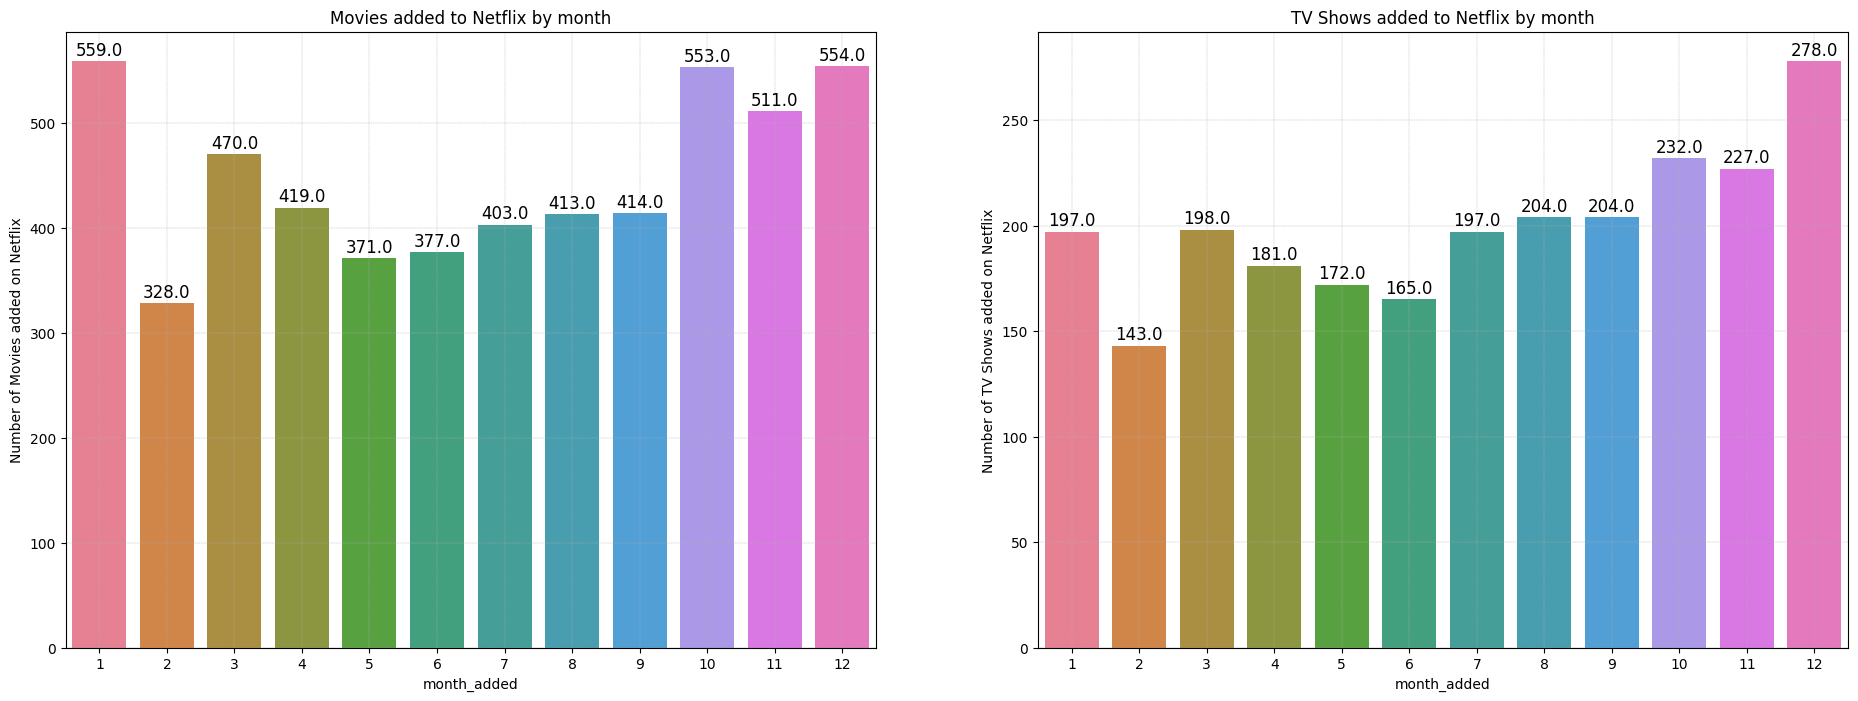

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_month = i.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['month_added'],ascending=False)
  plots= sns.barplot(x = 'month_added',y='title', data = df_month, palette='husl')
  plt.title(f'{j} added to Netflix by month')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

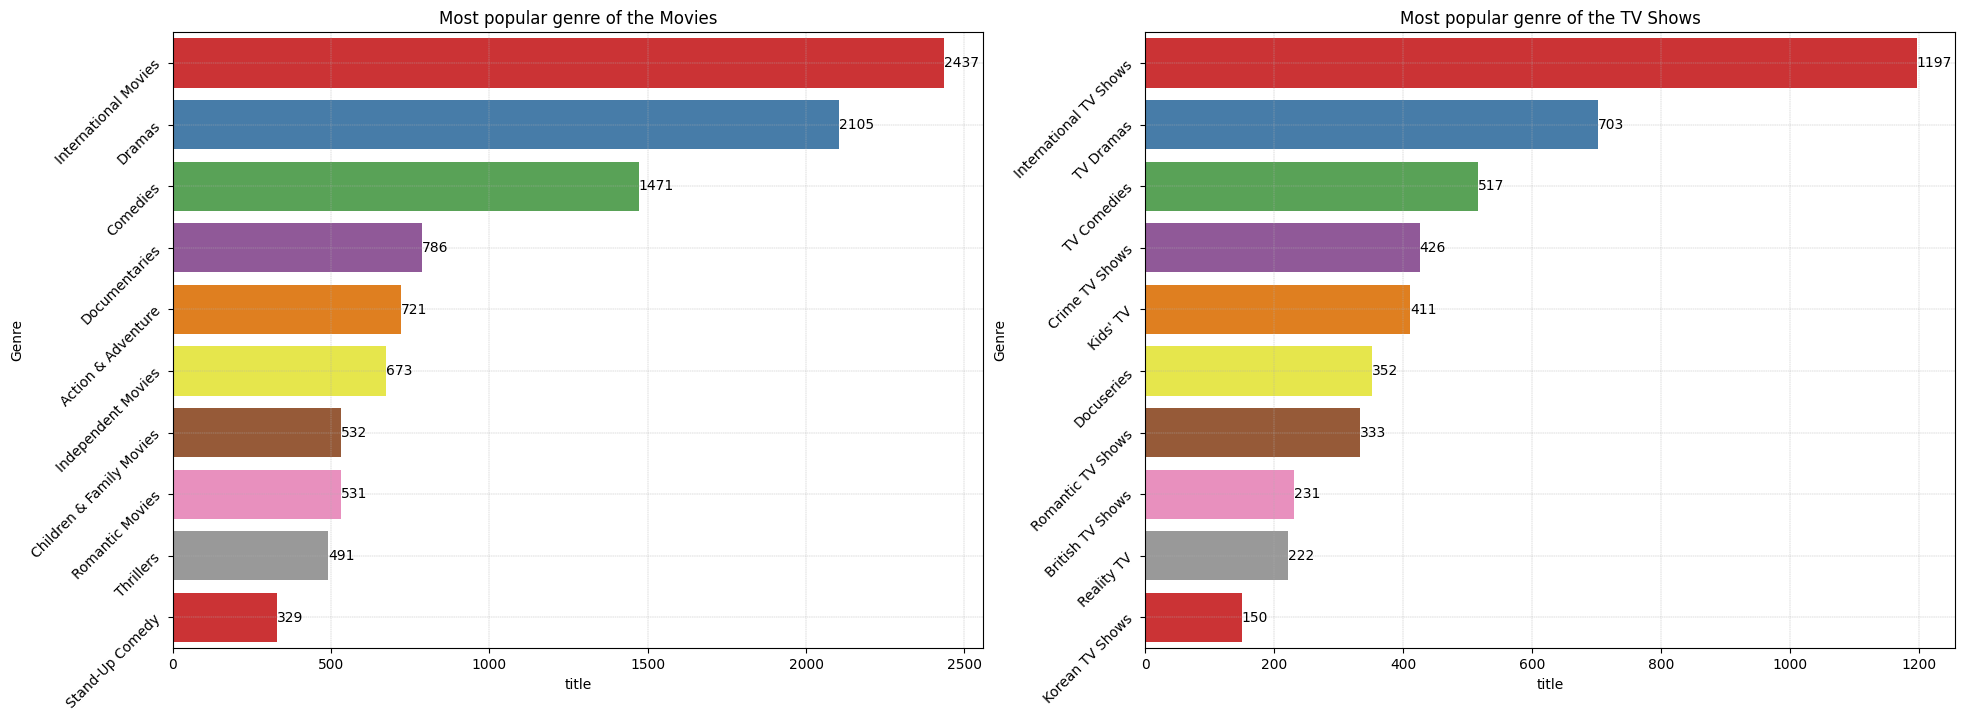

In [ ]:
# Chart - 11 visualization code

plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_genre = i.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Genre",x = 'title', data = df_genre, palette='Set1')
  plt.title(f'Most popular genre of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

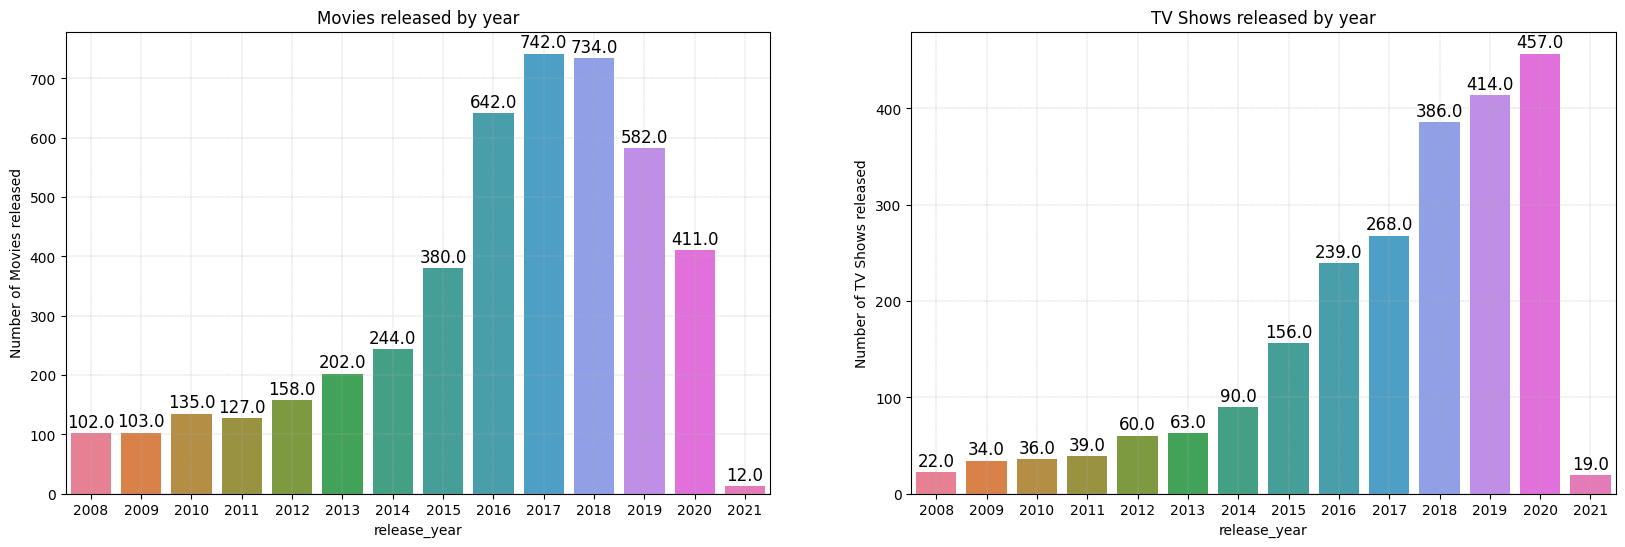

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_release_year = i.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by=['release_year'],ascending=False)[:14]
  plots= sns.barplot(x = 'release_year',y= 'title', data = df_release_year, palette='husl')
  plt.title(f'{j} released by year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

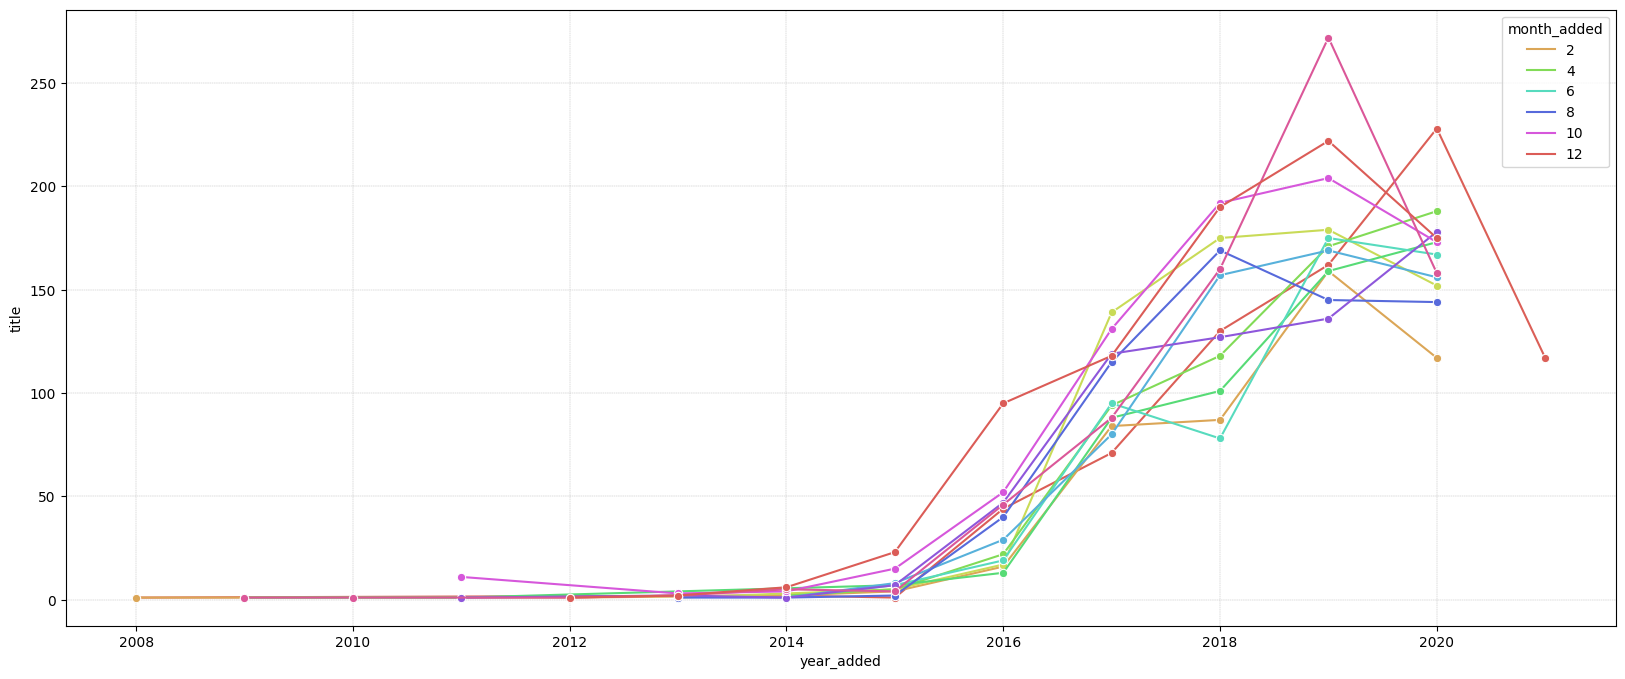

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(20,8))
df_year_month = netflix_df.groupby(['year_added','month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x ='year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['month_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

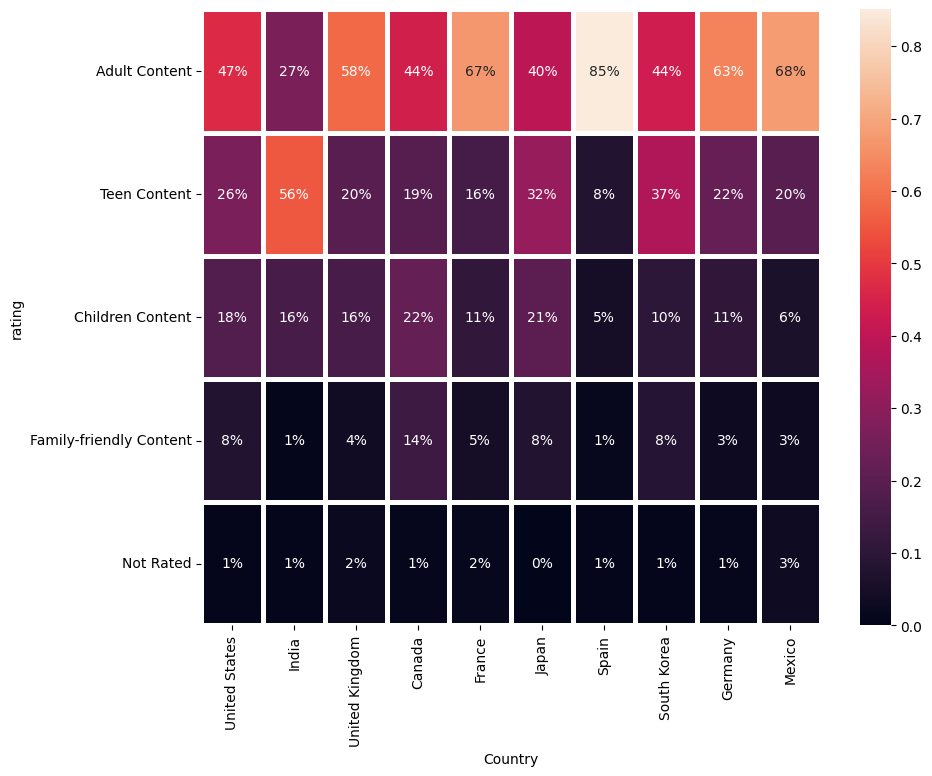

In [ ]:
# Correlation Heatmap visualization code
netflix_df['count'] = 1
data = netflix_df.groupby('Country')[['Country', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data = data['Country']
df_heatmap = netflix_df.loc[netflix_df['Country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['Country'], df_heatmap['rating'], normalize="index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Defining order of representation
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico']
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# Calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order, country_order], linewidth=2.5,annot=True,  fmt='1.0%', ax=ax)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['release_year'] == 2020)]
tv_2021 = netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

# Print the results
#if p < 0.05:
 #   print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
#else:
 #   print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')


t-value:  -6.002151232542292
p-value:  7.23381843379902e-09


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest

# Subset the data to only include drama and comedy movies
subset = netflix_df[netflix_df['Genre'].str.contains('Dramas') | netflix_df['Genre'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama * len(subset)), int(comedy * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stats, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stats)
print('p-value: ', p_value)


# Print the results of the z-test
if p_value < 0.05:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  64.8000705213286
p-value:  0.0
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# Handling Missing Values & Missing Value Imputation
netflix_df.isna().sum()

title           0
Genre           0
Directors       0
Actors          0
Country         0
type            0
release_year    0
rating          0
duration        0
description     0
day_added       0
month_added     0
year_added      0
dtype: int64

Let's move ahead, as we have already dealed with null/missing values from our dataset.

### 2. Handling Outliers

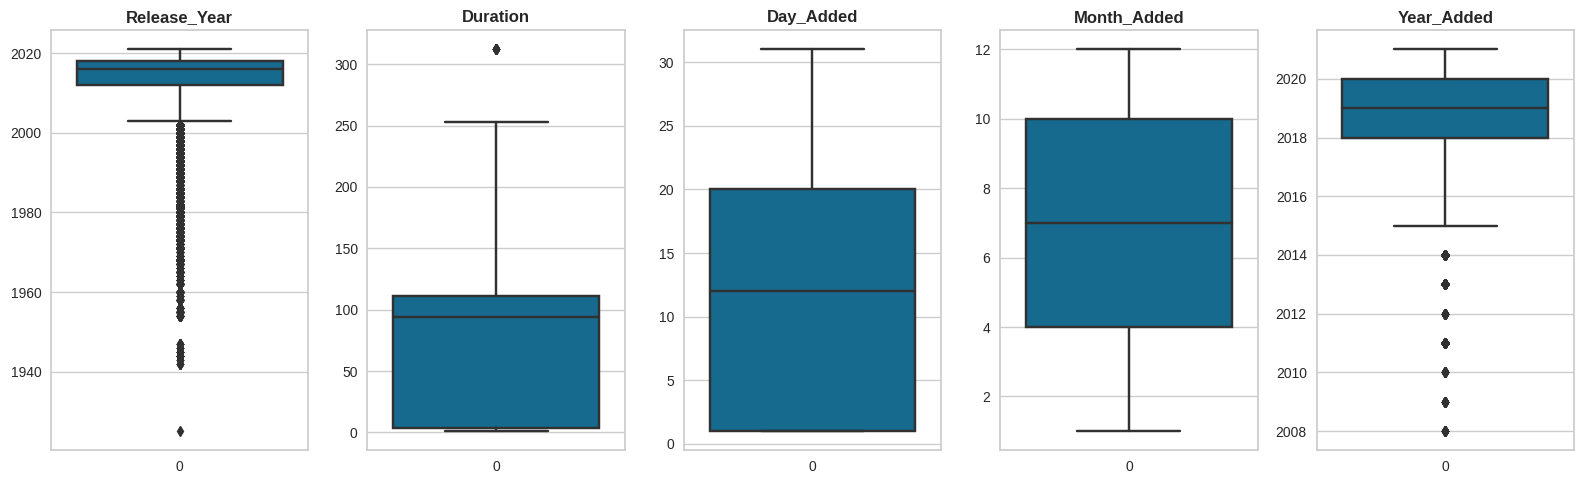

In [29]:
# Handling Outliers & Outlier treatments
value_feature= ["release_year","duration","day_added","month_added","year_added"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(netflix_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [33]:
new_netflix_df.shape,netflix_df.shape

((7770, 12), (175807, 13))

In [34]:
# Encode your categorical columns

new_netflix_df['rating'].replace(rating_map, inplace = True)

new_netflix_df.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
127,s128,Movie,6 Underground,Michael Bay,"Ryan Reynolds, MÃ©lanie Laurent, Corey Hawkins...",United States,"December 13, 2019",2019,Adult Content,129 min,"Action & Adventure, Dramas","After faking his death, a tech billionaire rec..."
568,s569,Movie,Arango y Sanint: RÃ­ase el show,"RaÃºl Campos, Jan Suter","JuliÃ¡n Arango, Antonio Sanint",Colombia,"January 17, 2018",2018,Adult Content,62 min,Stand-Up Comedy,Colombian stand-up comedians Antonio Sanint an...


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
# Combination of columns
new_netflix_df["content_detail"]= new_netflix_df["cast"]+" "+new_netflix_df["director"]+" "+new_netflix_df["listed_in"]+" "+new_netflix_df["type"]+" "+new_netflix_df["rating"]+" "+new_netflix_df["country"]+" "+new_netflix_df["description"]

#checking the manipulation
new_netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_detail
0,s1,TV Show,3%,Unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,Adult Content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ..."
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,Adult Content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,Adult Content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,Teen Content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,Teen Content,123 min,Dramas,A brilliant group of students become card-coun...,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


#### 2. Lower Casing

In [38]:
# Lower Casing
new_netflix_df['content_detail']= new_netflix_df['content_detail'].str.lower()

# Checking the manipulation
new_netflix_df.iloc[255]['content_detail']


"scott kelly unknown docuseries, international tv shows, science & nature tv tv show children content united states two astronauts attempt to brave a life in earth's orbit on a record-setting mission to see if humans have the endurance to survive a flight to mars."

#### 3. Removing Punctuations

In [40]:
# Remove Punctuations

def remove_punctuations(text):
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

new_netflix_df['content_detail']= new_netflix_df['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
new_netflix_df.iloc[255]['content_detail']

'scott kelly unknown docuseries international tv shows science  nature tv tv show children content united states two astronauts attempt to brave a life in earths orbit on a recordsetting mission to see if humans have the endurance to survive a flight to mars'

#### 4. Removing URLs & Removing words and digits contain digits.

In [42]:
# Remove URLs & Remove words and digits contain digits
def remove_url_and_numbers(text):
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)
    return text # return the text stripped off URL's and Numbers

In [45]:
# Remove URLs & Remove words and digits contain digits
new_netflix_df['content_detail']= new_netflix_df['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
new_netflix_df.iloc[255]['content_detail']

'scott kelly unknown docuseries international tv shows science  nature tv tv show children content united states two astronauts attempt to brave a life in earths orbit on a recordsetting mission to see if humans have the endurance to survive a flight to mars'

#### 5. Removing Stopwords & Removing White spaces

In [47]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:
# Remove White spaces
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text


# Remove URLs & Remove words and digits contain digits
new_netflix_df['content_detail']= new_netflix_df['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
new_netflix_df.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedies international movies scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***